In [4]:
import numpy as np
import plotly.graph_objects as go

imu_data = np.loadtxt("/home/nuci7/project/cf2/crazyflie-firmware/control/data/imu_data_1112-2123_45d.csv", delimiter=',')

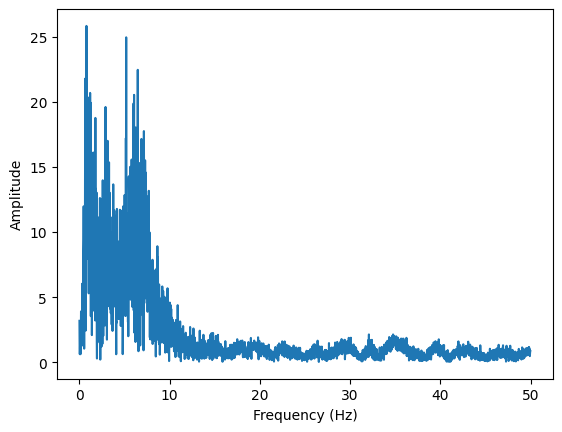

In [5]:
import numpy as np
import matplotlib.pyplot as plt
data = imu_data[:,0]
fft_result = np.fft.fft(data)
amplitude_spectrum = 2.0 / len(data) * np.abs(fft_result[:len(data)//2])
sampling_rate = 100
freq = np.arange(len(data)) * (sampling_rate / len(data))
plt.plot(freq[:len(data)//2], amplitude_spectrum)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

In [6]:
# 画图：4个motor+高度计
import scipy.signal as signal_p

# Define filter parameters
fs = 100  # Sampling frequency
fc = 4  # Cutoff frequency
order = 6  # Filter order



# Create low-pass Butterworth filter
b, a = signal_p.butter(order, fc / (fs / 2), btype='low')

# Apply filter to signal data
signalf = signal_p.filtfilt(b, a, imu_data[:,:6], axis=0)
timestamp = imu_data[:,-2]
fig = go.Figure()
fig.add_trace(go.Scatter(x=timestamp, y=imu_data[:,3],
                    mode='lines',
                    line=dict(width=0.5),
                    name='m1'))
fig.add_trace(go.Scatter(x=timestamp, y=imu_data[:,4],
                    mode='lines',
                    line=dict(width=0.5),
                    name='m2'))
fig.add_trace(go.Scatter(x=timestamp, y=imu_data[:,5],
                    mode='lines',
                    line=dict(width=0.5),
                    name='m3'))
fig.add_trace(go.Scatter(x=timestamp, y=imu_data[:,6],
                    mode='lines',
                    line=dict(width=0.5),
                    name='m4'))
fig.add_trace(go.Scatter(x=timestamp, y=imu_data[:,8]/1000,
                    mode='lines',
                    line=dict(width=0.5),
                    name='zrange'))


# # Add a rectangle to the plot
# fig.add_shape(type='rect',
#               x0=0,
#               y0=-2,
#               x1=10,
#               y1=2,
#               line=dict(color='blue', width=0.5),
#             #   fillcolor='lightblue',
#               opacity=0.5)

fig.add_shape(type='line',
                x0=0,
                y0=0,
                x1=timestamp[-1].astype(float),
                y1=0,
                line=dict(color='black', width=0.5),
            #   fillcolor='lightblue',
                opacity=1)

    
    


fig.update_layout(xaxis_title='timestamps s',
                        yaxis_title='Amplitude m/s2',
                        font=dict(size=25, family='Arial', color='rgb(0, 0, 0)'),
                        margin={'l': 15, 'r': 15, 't': 15, 'b': 15},
                        # width=1000, height=400,
                        legend=dict(
                            yanchor="top",
                            y=1.2,
                            xanchor="left",
                            x = 0.25,
                            font=dict(
                                family='Arial',
                                size=25,
                                color='rgb(0, 0, 0)',
                            ),
                            orientation="h",
                            # bordercolor="Black",
                            # borderwidth=1
                        ),
                        plot_bgcolor='rgb(255,255,255)',
                        xaxis=dict(
                            showline=True,
                            linecolor='rgb(0, 0, 0)',
                            linewidth=2,
                            ticks='inside',
                            tickfont=dict(
                                family='Arial',
                                size=20,
                                color='rgb(0, 0, 0)',
                            ),
                            tick0 = 150,
                            dtick = 10,
                            gridcolor='rgb(245, 245, 245)',
                            mirror=True
                        ),
                        yaxis=dict(
                            # range = [0, 1],
                            showline=True,
                            linecolor='rgb(0, 0, 0)',
                            linewidth=2,
                            ticks='inside',
                            tickfont=dict(
                                family='Arial',
                                size=20,
                                color='rgb(0, 0, 0)',
                            ),
                            tickformat='.2f',   # y轴刻度分辨率
                            gridcolor='rgb(245, 245, 245)',
                            mirror=True
                        ),
        )

fig.show()

In [9]:
# 画图：3轴陀螺仪+高度计

import scipy.signal as signal_p

# Define filter parameters
fs = 100  # Sampling frequency
fc = 4  # Cutoff frequency
order = 6  # Filter order



# Create low-pass Butterworth filter
b, a = signal_p.butter(order, fc / (fs / 2), btype='low')

# Apply filter to signal data
signalf = signal_p.filtfilt(b, a, imu_data[:,:6], axis=0)
timestamp = imu_data[:,7]
fig = go.Figure()
fig.add_trace(go.Scatter(x=timestamp, y=imu_data[:,0],
                    mode='lines',
                    line=dict(width=0.5),
                    name='aX'))
fig.add_trace(go.Scatter(x=timestamp, y=imu_data[:,1],
                    mode='lines',
                    line=dict(width=0.5),
                    name='aY'))
fig.add_trace(go.Scatter(x=timestamp, y=imu_data[:,2],
                    mode='lines',
                    line=dict(width=0.5),
                    name='aZ'))
fig.add_trace(go.Scatter(x=timestamp, y=imu_data[:,8]/1000,
                    mode='lines',
                    line=dict(width=0.5),
                    name='zrange'))


# # Add a rectangle to the plot
# fig.add_shape(type='rect',
#               x0=0,
#               y0=-2,
#               x1=10,
#               y1=2,
#               line=dict(color='blue', width=0.5),
#             #   fillcolor='lightblue',
#               opacity=0.5)

fig.add_shape(type='line',
                x0=0,
                y0=0,
                x1=timestamp[-1].astype(float),
                y1=0,
                line=dict(color='black', width=0.5),
            #   fillcolor='lightblue',
                opacity=1)

    
    


fig.update_layout(xaxis_title='timestamps s',
                        yaxis_title='Amplitude m/s2',
                        font=dict(size=25, family='Arial', color='rgb(0, 0, 0)'),
                        margin={'l': 15, 'r': 15, 't': 15, 'b': 15},
                        # width=1000, height=400,
                        legend=dict(
                            yanchor="top",
                            y=1.2,
                            xanchor="left",
                            x = 0.25,
                            font=dict(
                                family='Arial',
                                size=25,
                                color='rgb(0, 0, 0)',
                            ),
                            orientation="h",
                            # bordercolor="Black",
                            # borderwidth=1
                        ),
                        plot_bgcolor='rgb(255,255,255)',
                        xaxis=dict(
                            showline=True,
                            linecolor='rgb(0, 0, 0)',
                            linewidth=2,
                            ticks='inside',
                            tickfont=dict(
                                family='Arial',
                                size=20,
                                color='rgb(0, 0, 0)',
                            ),
                            tick0 = 150,
                            dtick = 10,
                            gridcolor='rgb(245, 245, 245)',
                            mirror=True
                        ),
                        yaxis=dict(
                            # range = [0, 1],
                            showline=True,
                            linecolor='rgb(0, 0, 0)',
                            linewidth=2,
                            ticks='inside',
                            tickfont=dict(
                                family='Arial',
                                size=20,
                                color='rgb(0, 0, 0)',
                            ),
                            tickformat='.2f',   # y轴刻度分辨率
                            gridcolor='rgb(245, 245, 245)',
                            mirror=True
                        ),
        )

fig.show()

In [318]:
# st = 2720
# on45 = imu_data[st-100:st+300,:]
# np.savetxt('/home/nuci7/project/cf2/crazyflie-firmware/control/train_data2/on45_10.txt', on45)

In [11]:
import numpy as np
import plotly.graph_objects as go

imu_data = np.loadtxt("/home/nuci7/project/cf2/crazyflie-firmware/control/train_data2/on45_7.txt", delimiter=' ')

In [299]:
# import numpy as np
# from scipy.signal import butter, filtfilt

# def butter_lowpass_filter(data, cutoff_freq, sampling_freq, order=5):
#     def butter_lowpass(cutoff_freq, sampling_freq, order=5):
#         nyquist_freq = 0.5 * sampling_freq
#         normal_cutoff = cutoff_freq / nyquist_freq
#         b, a = butter(order, normal_cutoff, btype='low', analog=False)
#         return b, a

#     def apply_lowpass_filter(data, cutoff_freq, sampling_freq, order=5):
#         b, a = butter_lowpass(cutoff_freq, sampling_freq, order=order)
#         filtered_data = filtfilt(b, a, data)
#         return filtered_data

#     filtered_data = apply_lowpass_filter(data, cutoff_freq, sampling_freq, order=order)
#     return filtered_data
# imu_data = imu_data[:,:7]

# # 设置截止频率和采样频率
# cutoff_freq = 50  # 截止频率为2Hz
# sampling_freq = 200  # 采样频率为10Hz
# # 应用低通滤波器
# imu_data1 = butter_lowpass_filter(imu_data[:,0], cutoff_freq, sampling_freq, order=5)
# imu_data2 = butter_lowpass_filter(imu_data[:,1], cutoff_freq, sampling_freq, order=5)
# imu_data3 = butter_lowpass_filter(imu_data[:,2], cutoff_freq, sampling_freq, order=5)

In [10]:
import scipy.signal as signal_p

# Define filter parameters
fs = 100  # Sampling frequency
fc = 40  # Cutoff frequency
order = 6  # Filter order
# Create low-pass Butterworth filter
b, a = signal_p.butter(order, fc / (fs / 2), btype='low')

# Apply filter to signal data
signalf = signal_p.filtfilt(b, a, imu_data[:,:9], axis=0)
timestamp = np.asarray(list(range(4000)))
fig = go.Figure()
fig.add_trace(go.Scatter(x=timestamp, y=signalf[:,4]-signalf[:,3],
                    mode='lines',
                    line=dict(width=0.5),
                    name='aX'))
fig.add_trace(go.Scatter(x=timestamp, y=signalf[:,5]-signalf[:,3],
                    mode='lines',
                    line=dict(width=0.5),
                    name='aY'))
fig.add_trace(go.Scatter(x=timestamp, y=signalf[:,6]-signalf[:,3],
                    mode='lines',
                    line=dict(width=0.5),
                    name='aZ'))

fig.add_trace(go.Scatter(x=timestamp, y=imu_data[:,-1]/1000,
                    mode='lines',
                    line=dict(width=0.5),
                    name='zrange'))


# # Add a rectangle to the plot
# fig.add_shape(type='rect',
#               x0=0,
#               y0=-2,
#               x1=10,
#               y1=2,
#               line=dict(color='blue', width=0.5),
#             #   fillcolor='lightblue',
#               opacity=0.5)

fig.add_shape(type='line',
                x0=0,
                y0=0,
                x1=timestamp[-1].astype(float),
                y1=0,
                line=dict(color='black', width=0.5),
            #   fillcolor='lightblue',
                opacity=1)

    
    


fig.update_layout(xaxis_title='timestamps s',
                        yaxis_title='Amplitude m/s2',
                        font=dict(size=25, family='Arial', color='rgb(0, 0, 0)'),
                        margin={'l': 15, 'r': 15, 't': 15, 'b': 15},
                        # width=1000, height=400,
                        legend=dict(
                            yanchor="top",
                            y=1.2,
                            xanchor="left",
                            x = 0.25,
                            font=dict(
                                family='Arial',
                                size=25,
                                color='rgb(0, 0, 0)',
                            ),
                            orientation="h",
                            # bordercolor="Black",
                            # borderwidth=1
                        ),
                        plot_bgcolor='rgb(255,255,255)',
                        xaxis=dict(
                            showline=True,
                            linecolor='rgb(0, 0, 0)',
                            linewidth=2,
                            ticks='inside',
                            tickfont=dict(
                                family='Arial',
                                size=20,
                                color='rgb(0, 0, 0)',
                            ),
                            tick0 = 150,
                            dtick = 10,
                            gridcolor='rgb(245, 245, 245)',
                            mirror=True
                        ),
                        yaxis=dict(
                            # range = [0, 1],
                            showline=True,
                            linecolor='rgb(0, 0, 0)',
                            linewidth=2,
                            ticks='inside',
                            tickfont=dict(
                                family='Arial',
                                size=20,
                                color='rgb(0, 0, 0)',
                            ),
                            tickformat='.2f',   # y轴刻度分辨率
                            gridcolor='rgb(245, 245, 245)',
                            mirror=True
                        ),
        )

fig.show()

In [16]:
14*290/400

10.15

In [41]:
def quatdecompress(comp):
    q = np.zeros(4)
    mask = (1 << 9) - 1
    i_largest = comp >> 30
    sum_squares = 0
    for i in range(3, -1, -1):
        if i != i_largest:
            mag = comp & mask
            negbit = (comp >> 9) & 0x1
            comp = comp >> 10
            q[i] = mag / mask / np.sqrt(2)
            if negbit == 1:
                q[i] = -q[i]
            sum_squares += q[i] * q[i]
    q[i_largest] = np.sqrt(1.0 - sum_squares)
    return q

q = quatdecompress(3463829145)

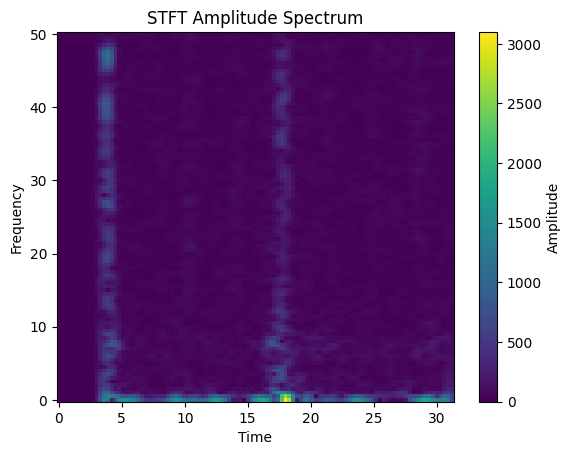

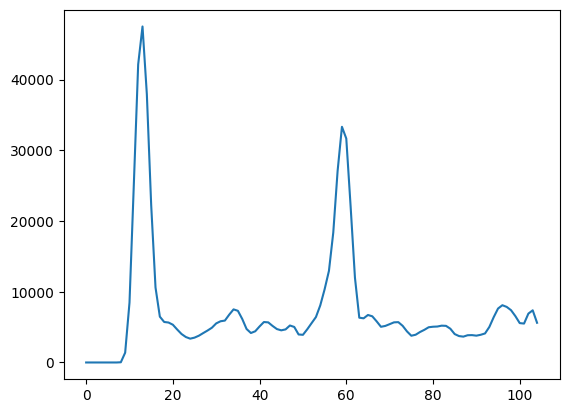

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

# 准备数据
t = np.linspace(0, 1, 1000)  # 时间轴
x = np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 120 * t)  # 信号

# 进行短时傅里叶变换
f, t, Zxx = stft(imu_data[:,6]-imu_data[:,3], fs=100, nperseg=200, noverlap=170)

# 绘制幅度谱
plt.pcolormesh(t, f, np.abs(Zxx), shading='auto')
plt.colorbar(label='Amplitude')
plt.title('STFT Amplitude Spectrum')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

# print(np.shape(Zxx))

dd = np.abs(Zxx)
pp = np.sum(dd, axis=0)
plt.plot(pp)

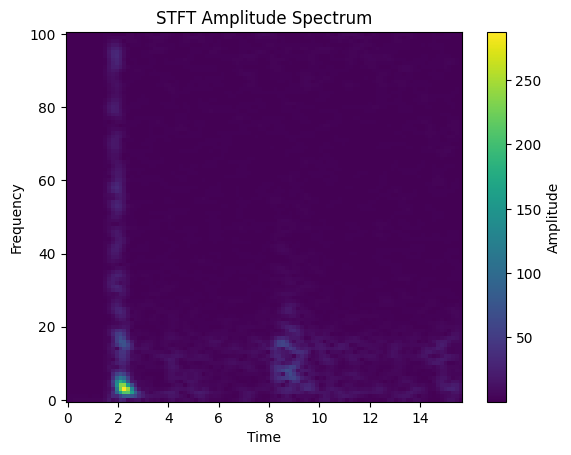

(101, 105)


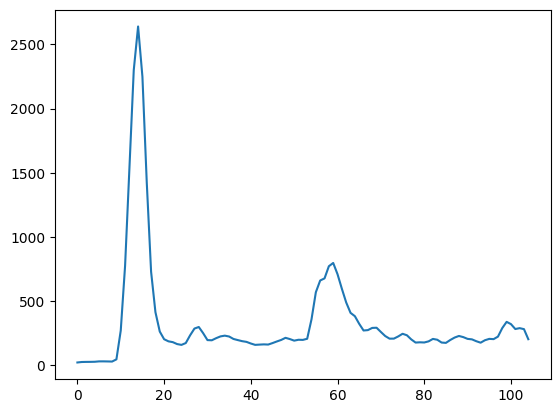

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

# 准备数据
t = np.linspace(0, 1, 1000)  # 时间轴
x = np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 120 * t)  # 信号

# 进行短时傅里叶变换
f, t, Zxx = stft(imu_data[:,0], fs=200, nperseg=200, noverlap=170)

# 绘制幅度谱
plt.pcolormesh(t, f, np.abs(Zxx), shading='auto')
plt.colorbar(label='Amplitude')
plt.title('STFT Amplitude Spectrum')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

print(np.shape(Zxx))

dd = np.abs(Zxx)
pp = np.sum(dd, axis=0)
plt.plot(pp)

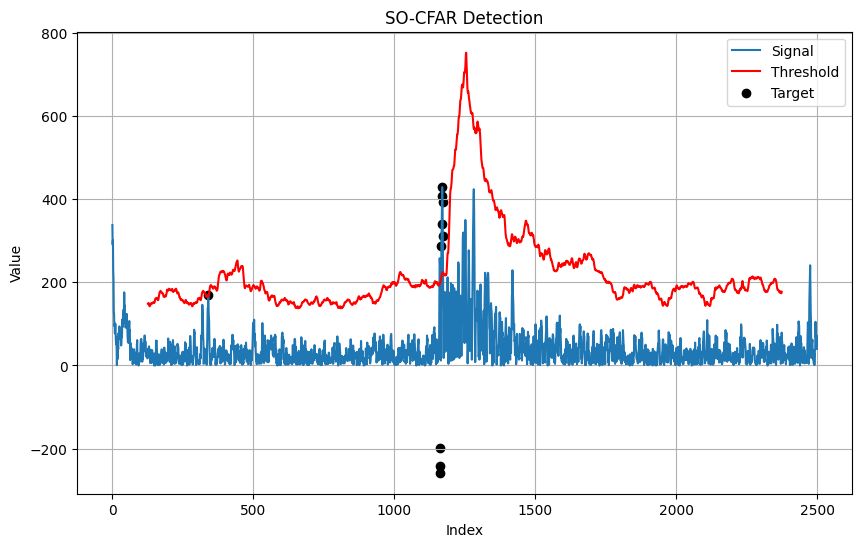

In [64]:
import numpy as np
import matplotlib.pyplot as plt

def cfar_so(xc, N, pro_N, PAD):
    # 假设回波服从高斯分布
    alpha = N * (PAD ** (-1 / N) - 1)
    target = []
    index = np.arange(1 + N/2 + pro_N/2, len(xc) - N/2 - pro_N/2)
    XT = np.zeros(len(index))

    for i in index:
        cell_left = xc[int(i - N/2 - pro_N/2) : int(i - pro_N/2)]
        cell_right = xc[int(i + pro_N/2 + 1) : int(i + N/2 + pro_N/2 + 1)]
        Z = np.min([np.mean(cell_left), np.mean(cell_right)])
        # print(alpha)
        XT[int(i - N/2 - pro_N/2-1)] = Z * alpha
        if xc[int(i)] > Z * alpha:
            target.append(int(i))
    return index, XT, target

# 均匀背景噪声
def env_uniform(variance, shape, power_db, show_out=False):
    if not show_out:
        show_out = 0

    c = 10**(power_db/10)  # 这里是幅度——功率，实际的噪声功率
    xc = c + np.random.normal(0, variance, shape)  # 产生一个正态分布/高斯分布的噪声，期望为0，标准差为variance，shape形状的数组

    if show_out:
        plt.figure()
        plt.plot(10 * np.log10(np.abs(xc)) / np.log10(10))
        plt.show()

    return xc

# 设置参数
SNR1 = 15
N = 200
pro_N = 50
PAF = 10**(-3)

# 生成噪声信号
variance = 200
shape = (200,)
noise_db = 20
noise_p = 10**(noise_db/10)
xc = env_uniform(variance, shape, noise_db)

# # 添加信号
# signal1_p = 10**(SNR1/10) * noise_p
# xc[89] = signal1_p
xc = imu_data[500:3000,0]
# xc = imu_data[:,0]
# 应用CFAR算法
index, XT, target_idx = cfar_so(np.abs(xc), N, pro_N, PAF)

# 可视化结果
plt.figure(figsize=(10, 6))
plt.plot((np.abs(xc)), label='Signal')
plt.plot(index, (XT), 'r', label='Threshold')
plt.scatter(target_idx, xc[target_idx],color='black', label='Target')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('SO-CFAR Detection')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
i = 20
start = i - N/2 - pro_N/2
end = i - pro_N/2
xc[ start:end ]

TypeError: slice indices must be integers or None or have an __index__ method